# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting. **Also** make sure to turn in your homework on Moodle (so we have a backup copy).



In [2]:
"""
Name: Rahul Yedida
HW Group Number: 1
"""

'\nName: Rahul Yedida\nHW Group Number: 1\n'

# Homework 2

## Classification and Cross Validation


### Import all necessary libraries

In [3]:
# you should be familiar with numpy, pandas and matplotlib from HW0
import numpy as np
# set a seed for reproducibility
np.random.seed(23)

import pandas as pd
import matplotlib.pyplot as plt

# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets

# we will also be using the DecisionTreeClassifier library from scikit learn for this exercise
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# we will use the MinMaxScaler method to scale our data
from sklearn.preprocessing import MinMaxScaler

# to generate k-folds from the data
from sklearn.model_selection import KFold, train_test_split

# we will also use sklearn.metrics to calculate a confusion matrix
from sklearn.metrics import confusion_matrix

# to calulate distance matrix
from sklearn.metrics import pairwise_distances

# Remember you have to run this cell block before continuing!

### Data

We'll be using the Wine dataset from previous exercises for this homework.
Please note that we've already split the dataset into three parts:
* a ***wine_train.csv*** which is used to train your models
* a ***wine_test.csv*** which you will use to evaluate your models
* another dataset, having the same properties as wine_train and wine_test to be used by the TAs for grading. This is not provided to you and will be used as part of grading your solutions.

You are provided the following variables:

* ```wine_train_x```: a numpy array referring to the features in training data. Each row is a separate data point and each column refers to the features.
* ```wine_train_y```: a numpy array of shape refers to the class variable in training data.
* ```wine_test_x```: a numpy array referring to the features in test data. Each row is a separate data point and each column refers to the features. Test data and training data have the same features. 
* ```wine_test_y```: a numpy array referring to the class variable in test data

In [4]:
wine_train = pd.read_csv('/etc/data/wine_train.csv')
wine_test = pd.read_csv('/etc/data/wine_test.csv')

# split the training data frame into features and class variables for use later. 
# take a look at the variable names and their descriptions in the cell above.
wine_train_y = wine_train['Wine_Type'].values
wine_train_x = wine_train.drop(['Wine_Type'], axis=1).values

# now do the same with test data
wine_test_y = wine_test['Wine_Type'].values
wine_test_x = wine_test.drop(['Wine_Type'], axis=1).values

# Problem 1.1: Evaluation Measures
In this 2-part problem, you will be writing code to calculate accuracy, precision, recall and f1 score **by hand**, from a confusion matrix generated by sklearn.

*Note*: In practice, sklearn offers methods to calculate each of these scores, but you are asked to calculate them by hand to practice working with a confusion matrix.

In [5]:
def evaluation_measures(y_true, y_pred):
    """
    Write a single function to calculate accuracy and a confusion matrix for the given data
    Input:
        y_true: A numpy array containing the actual ground truth labels
        y_pred: A numpy array containing the predicted labels from a model (such as a decision tree or knn classifier)
                y_pred has the same dimensions as y_true
                
    Output:
        A list in the following order:
        overall accuracy score, confusion matrix
    
    Allowed Libraries: sklearn.metrics.confusion_matrix and np methods *only* (no other sklearn metrics)
    
    Hint: Take a look at confusion_matrix method from sklearn.metrics
    """
    # YOUR CODE HERE
    confusion = confusion_matrix(y_true, y_pred)
    acc = sum([confusion[i][i] for i in range(len(confusion))]) / np.sum(confusion)
    
    return [acc, confusion]

In [6]:
# Test your code!
# creating two random roles
true_labels = np.array([0, 1, 1, 0, 1, 1]) 
pred_labels = np.array([0, 0, 1, 0, 1, 1]) 
accuracy, cm = evaluation_measures(y_true=true_labels, y_pred=pred_labels)
# Note: sklearn's Confusion matrix puts true negatives in M[0, 0], but you may be
# used to seeing them at [1, 1] from the slides in class. Read the documentation.
print(f'Accuracy of the dummy data is {accuracy}\nConfusion Matrix is\n{cm}')

Accuracy of the dummy data is 0.8333333333333334
Confusion Matrix is
[[2 0]
 [1 3]]


In [7]:
true_labels = np.array([0, 1, 1, 0, 1, 1]) 
pred_labels = np.array([0, 0, 1, 0, 1, 1]) 
evaluation_results = evaluation_measures(y_true=true_labels, y_pred=pred_labels)
assert type(evaluation_results) == list
assert len(evaluation_results) == 2
np.testing.assert_almost_equal(evaluation_results[0], 0.8333333333333334)
np.testing.assert_equal(evaluation_results[1], np.array([[2, 0], [1, 3]]))

In [8]:
# Remember, we will also use hidden test cases - you should create your own too

In [9]:
def evaluation_measures2(y_true, y_pred):
    """
    Write a single function to calculate precision, recall and f1 score for the given data.
    Input: Two binary vectors of 0s (negative class) or 1s (positive class)
        y_true: A numpy array containing the actual ground truth labels
        y_pred: A numpy array containing the predicted labels from a model (such as a decision tree or knn classifier)
                y_pred has the same dimensions as y_true
                
    Output:
        A list in the following order:
        precision, recall, f1-score
        
    Note: You can assume there are only 2 classes, 1 (positive) and 0 (negative)
    
    Allowed Libraries: sklearn.metrics.confusion_matrix and np methods *only* (no other sklearn metrics)
    
    Hint: Take a look at confusion_matrix method from sklearn.metrics
    """
    # YOUR CODE HERE
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    prec = tp / (tp + fp)# if tp + fp != 0 else 0
    rec = tp / (tp + fn) #if tp + fn != 0 else 0
    f1 = 2 * prec * rec / (prec + rec) if prec + rec != 0 else 0
    
    return [prec, rec, f1]

In [10]:
# Test your code!
# creating two random roles
true_labels = np.array([0, 1, 1, 0, 1, 1]) 
pred_labels = np.array([0, 0, 1, 0, 1, 1]) 
precision, recall, f1 = evaluation_measures2(y_true=true_labels, y_pred=pred_labels)
# Calculate these values by hand - are they correct?
print(f'Precision: {precision}\nRecall: {recall}\nF1: {f1}')

Precision: 1.0
Recall: 0.75
F1: 0.8571428571428571


In [11]:
true_labels = np.array([0, 1, 1, 0, 1, 1]) 
pred_labels = np.array([0, 0, 1, 0, 1, 1]) 
evaluation_results = evaluation_measures2(y_true=true_labels, y_pred=pred_labels)
assert type(evaluation_results) == list
assert len(evaluation_results) == 3
np.testing.assert_almost_equal(evaluation_results[0], 3/3)
np.testing.assert_almost_equal(evaluation_results[1], 3/4)
np.testing.assert_almost_equal(evaluation_results[2], 3/3.5)

In [12]:
# Remember, we will also use hidden test cases - you should create your own too

# Decision Trees

## Examples

You can perform classification using a DecisionTree in python using the scikit-learn library. 

Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to get a clear understanding of all function arguments.

Given below is a simple toy example for you to learn how to use the DecisionTreeClassifier.

Predicted labels shape is (50,)
Accuracy of your model is 0.96,
Confusion matrix is:
 [[19  0  0]
 [ 0 15  0]
 [ 0  2 14]]


[Text(133.92000000000002, 199.32, 'X[3] <= 0.292\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[2] <= 0.653\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(66.96000000000001, 126.83999999999999, 'X[3] <= 0.667\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(100.44000000000001, 90.6, 'X[0] <= 0.485\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 126.83999999999999, 'X[3] <= 0.688\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(234.36, 90.6, 'X[2] <= 0.737\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(200.88000000000002, 

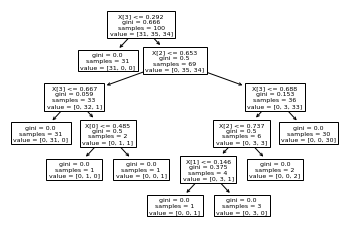

In [13]:
# let's use a toy dataset to demonstrate DecisionTreeClassifier. 
# We are using the iris dataset from sklearn.datasets as our toy dataset.
# We will apply DecisionTreeClassifier on it and perform classification. 
# we will use train_test_split from Sklearn to split our data into training and testing in a stratified manner
# first, load the data
toy_dataset_sk = datasets.load_iris()
toy_labels = toy_dataset_sk.target

# split into train and test in a stratified manner
toy_dataset_train, toy_dataset_test, toy_labels_train, toy_labels_test = train_test_split(toy_dataset_sk.data, 
                                                                                          toy_labels, 
                                                                                          test_size = 0.33)

# scale the train and test datasets
# note that we fit the scaler only on the training dataset, since we
# should not "leak" information from the test dataset (e.g. it's mean, sd)
# into the model
toy_scaler = MinMaxScaler().fit(toy_dataset_train)
toy_dataset_train = toy_scaler.transform(toy_dataset_train)
toy_dataset_test = toy_scaler.transform(toy_dataset_test)

# apply DecisionTreeClassifier on the toy dataset 
# in this case, we're using the gini index to split the data
# first initialize the DecisionTreeClassifier variable
# we'll also set the seed to 23 for reproducibility
toy_decision_tree = DecisionTreeClassifier(criterion='gini', random_state=23)
# now, train the model
toy_decision_tree.fit(X=toy_dataset_train, y=toy_labels_train)
# predict on the test set
toy_predictions = toy_decision_tree.predict(X=toy_dataset_test)

# evaluate your model and print the accuracy 
toy_evaluations = evaluation_measures(y_true=toy_labels_test, y_pred=toy_predictions)

# print the evaluation of the model
print(f'Predicted labels shape is {toy_labels_test.shape}\nAccuracy of your model is {toy_evaluations[0]},\
\nConfusion matrix is:\n {toy_evaluations[1]}')

# print the tree itself, using the sklearn.tree.plot_tree function
plot_tree(toy_decision_tree)

# Problem 1.2: Decision Tree

In [14]:
def dtree(x_train, y_train, x_test, criterion, random_state):
    """
    Using the example above, you will build a decision tree using the x_train and y_train and predict using x_test.
    Your inputs and outputs are as shown below:
    
    Input:
          x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
          the number of rows in your training dataset and n_attributes refers to the number of attributes. 
          y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
          training dataset.
          x_test: A numpy array of shape (n_testing_rows, n_attributes) where n_testing_rows refers to the number 
          of rows in your testing dataset and n_attributes refers to the number of attributes. 
          criterion: A string variable, can be either 'entropy' or 'gini'
          random_state: An integer to specify the random seed for the classifier (this creates deterministic output)
          
    Output:
          A numpy array of shape (n_testing_rows, ) containing the predicted labels for each row in your testing dataset. 
    Allowed Libraries: sklearn
    """
    
    # YOUR CODE HERE
    tree = DecisionTreeClassifier(criterion=criterion, random_state=random_state)
    tree.fit(x_train, y_train)
    
    return tree.predict(x_test)

In [15]:
# Test your code!
wine_dtree_predictions = dtree(x_train=wine_train_x, y_train=wine_train_y,
                               x_test=wine_test_x, 
                               criterion='gini', 
                               random_state=23)
wine_dtree_evaluations = evaluation_measures(y_true=wine_test_y,
                                    y_pred=wine_dtree_predictions)
print(f'Predicted labels shape is {wine_dtree_predictions.shape}\
\nAccuracy of your model is {wine_dtree_evaluations[0]}\
\nConfusion matrix of your model is\n {wine_dtree_evaluations[1]}')

Predicted labels shape is (40,)
Accuracy of your model is 0.95
Confusion matrix of your model is
 [[15  0  0]
 [ 0 13  2]
 [ 0  0 10]]


In [16]:
wine_dtree_predictions = dtree(x_train=wine_train_x, y_train=wine_train_y,
                               x_test=wine_test_x, 
                               criterion='entropy', 
                               random_state=23)
wine_dtree_evaluations = evaluation_measures(y_true=wine_test_y,
                                    y_pred=wine_dtree_predictions)
assert wine_dtree_predictions.shape[0] == 40
np.testing.assert_equal(wine_dtree_evaluations[0], 0.9)
wine_confusion_matrix = np.array([[14, 1, 0], [2, 12, 1], [0, 0, 10]])
np.testing.assert_equal(wine_dtree_evaluations[1], wine_confusion_matrix)

In [17]:
# Remember, we will also use hidden test cases - you should create your own too

# Problem 1.3: k - Nearest Neighbors

In HW1, we evaluated some distances (cosine, euclidean). Now we'll use them to perform classification using the K-Nearest Neighbors algorithm. 


## Instructions
Please read the following instructions carefully before implementing your method:

* **NOTE 1:** In this exercise, you're being asked to **implement** the K-Nearest Neighbors algorithm. Using the standard knn methods from sklearn or any builtin knn methods will result in an automatic zero.

* **NOTE 2:** In case of conflicts, with equal nearest neighbors of different classes, choose the class with lower numerical value. E.g.: in 4NN, if you have 2 NN of class 1, 2 NN of class 2, there is a conflict b/w class 1 and class 2
  In this case, you will choose class 1. 
              

In [18]:
# Some useful functions for the knn method
def calculate_distance_matrix(x_test , x_train, distance_type):
    """
    This method calculates the distance matrix required for KNN classifier
    Use this method to make your distance calculations easy.
    
    Input: x_test and x_train are two numpy matrices referring to the test features and train features respectively. 
           distance_type is a string specifying the type of distance. Can be 'euclidean_distance' or 'cosine_distance'
    Output: A matrix of shape (test_rows, train_rows), where the item at index [i, j] is the distance between
            x_test[i] and x_train[j].
    """
    if distance_type == 'euclidean_distance':
        return pairwise_distances(x_test, x_train, metric='euclidean')
    elif distance_type == 'cosine_distance':
        return pairwise_distances(x_test, x_train, metric='cosine')
    else:
        return None
    

### Some examples that may help you with the exercise

In [19]:
# We're using the same toy_dataset_train, toy_dataset_test, toy_labels_train, toy_labels_test
# variables from the previous exercise. Please make sure you run that cell before running this.

# let us compute the euclidean distance matrix between toy_dataset_train and toy_dataset_test
toy_knn_distance_matrix = calculate_distance_matrix(
    toy_dataset_test, toy_dataset_train, 'euclidean_distance')

# check the shape of the toy_distance_matrix. 
# It is the distance from the 50 test points to every training point (100 in total). 
# So the shape should be (50, 100)
print(f'Shape of the toy_distance_matrix is {toy_knn_distance_matrix.shape}\n')

first_instance_distances = toy_knn_distance_matrix[0,0:20]
print('Distances of the 1st test instance to the first 20 rows in the ' +
      f'training data, respectively: \n{first_instance_distances}\n')

# argsort sorts an array, but it returns the *indexes* of the items in original array, in sorted order
# See: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
sorted_indices = np.argsort(first_instance_distances)
# Note that the first item is 9, and index 9 (0-based) of the distances is 0.1410621, the lowest value
print(f'The indices of nearest neighbors :\n{sorted_indices}')

# Indices of the nearest 3 neighbors (in the first 20 rows of the training dataset)
nearest_neighbor_indices = sorted_indices[:3]
nn_classes = toy_labels_train[nearest_neighbor_indices]
print (f'\nThe classes of the 3 nearest neighbors: {nn_classes}')
print (f'\nThe classes of the test instance: {toy_labels_test[0]}')




Shape of the toy_distance_matrix is (50, 100)

Distances of the 1st test instance to the first 20 rows in the training data, respectively: 
[0.24139627 0.25486661 1.21078229 0.43009841 0.53117037 0.31897809
 0.43671289 0.43830209 1.2008583  0.1410621  0.19383105 1.20912393
 0.58737102 1.06063354 0.19596018 0.66938633 0.33451659 0.20034097
 0.37216494 0.40413329]

The indices of nearest neighbors :
[ 9 10 14 17  0  1  5 16 18 19  3  6  7  4 12 15 13  8 11  2]

The classes of the 3 nearest neighbors: [2 1 2]

The classes of the test instance: 2


In [20]:
!python3 --version

Python 3.7.3


In [21]:
from collections import Counter

In [28]:
def knn(x_train, y_train, x_test, k, distance_type):
    """
    Input:
          x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
          the number of rows in your training dataset and n_attributes refers to the number of attributes. 
          y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
          training dataset.
          x_test: A numpy array of shape (n_testing_rows, n_attributes) where n_testing_rows refers to the number 
          of rows in your testing dataset and n_attributes refers to the number of attributes.
          k: An integer specifying the number of nearest neighbors 
          distance_type: A string describing the type of distance (can be 'cosine_distance' or 'euclidean_distance')
          
    Output:
           A numpy vector of the shape (n_testing_rows, ) containing the predicted labels for each testing data point.
            
    """
    # YOUR CODE HERE
    dist = calculate_distance_matrix(x_test, x_train, distance_type)
    nearest = np.argsort(dist, axis=1)[:,:k]
    nearest_labels = y_train[nearest]
    
    def get_mode(x): 
        ctr = Counter(x)
        common = ctr.most_common()
        amax = max(common, key=lambda p: p[1])[1]
        maxes = list(filter(lambda p: p[1] == amax, common))
        return min(maxes, key=lambda p: p[0])[0]
    
    return np.array(list(map(get_mode, nearest_labels)))

In [29]:
# Test your code!
wine_knn_predictions =  knn(x_train=wine_train_x, y_train=wine_train_y,
                               x_test=wine_test_x, 
                               k=3,
                               distance_type='cosine_distance')
wine_knn_evaluations = evaluation_measures(y_true=wine_test_y, y_pred=wine_knn_predictions)
print(f'Predicted labels shape is {wine_knn_predictions.shape} \nAccuracy of your model is {wine_knn_evaluations[0]}\n\
Confusion Matrix is\n{wine_knn_evaluations[1]}')

[(1, 2), (0, 1)]
2
[(1, 2)]
[(1, 2), (2, 1)]
2
[(1, 2)]
[(0, 3)]
3
[(0, 3)]
[(0, 2), (1, 1)]
2
[(0, 2)]
[(0, 2), (1, 1)]
2
[(0, 2)]
[(0, 3)]
3
[(0, 3)]
[(0, 3)]
3
[(0, 3)]
[(0, 3)]
3
[(0, 3)]
[(1, 2), (0, 1)]
2
[(1, 2)]
[(0, 3)]
3
[(0, 3)]
[(2, 3)]
3
[(2, 3)]
[(0, 3)]
3
[(0, 3)]
[(0, 3)]
3
[(0, 3)]
[(0, 3)]
3
[(0, 3)]
[(0, 2), (1, 1)]
2
[(0, 2)]
[(1, 3)]
3
[(1, 3)]
[(0, 3)]
3
[(0, 3)]
[(0, 3)]
3
[(0, 3)]
[(2, 3)]
3
[(2, 3)]
[(0, 3)]
3
[(0, 3)]
[(1, 3)]
3
[(1, 3)]
[(1, 2), (0, 1)]
2
[(1, 2)]
[(2, 3)]
3
[(2, 3)]
[(1, 3)]
3
[(1, 3)]
[(1, 3)]
3
[(1, 3)]
[(2, 2), (1, 1)]
2
[(2, 2)]
[(0, 3)]
3
[(0, 3)]
[(2, 3)]
3
[(2, 3)]
[(1, 2), (2, 1)]
2
[(1, 2)]
[(0, 3)]
3
[(0, 3)]
[(2, 3)]
3
[(2, 3)]
[(0, 3)]
3
[(0, 3)]
[(0, 3)]
3
[(0, 3)]
[(1, 3)]
3
[(1, 3)]
[(2, 3)]
3
[(2, 3)]
[(2, 3)]
3
[(2, 3)]
[(1, 3)]
3
[(1, 3)]
[(2, 3)]
3
[(2, 3)]
[(2, 3)]
3
[(2, 3)]
[(1, 3)]
3
[(1, 3)]
Predicted labels shape is (40,) 
Accuracy of your model is 0.925
Confusion Matrix is
[[15  0  0]
 [ 3 12  0]
 [ 0  0 10]]


In [ ]:
wine_knn_predictions =  knn(x_train=wine_train_x, y_train=wine_train_y,
                               x_test=wine_test_x, 
                               k=3,
                               distance_type='euclidean_distance')
wine_knn_evaluations = evaluation_measures(y_true=wine_test_y, y_pred=wine_knn_predictions)
assert wine_knn_predictions.shape[0] == 40
np.testing.assert_equal(wine_knn_evaluations[0], 0.9)
np.testing.assert_equal(wine_knn_evaluations[1], [[15,0,0], [3,12,0], [0,1,9]])

In [ ]:
# Remember, we will also use hidden test cases - you should create your own too

# Problem 4: k-Fold Cross Validation (522: required; 422: bonus)

In the next part of this homework, we'll work on k-fold cross validation. 
We can create random folds using the [KFold method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

Let us start with some examples.

**Note**: This problem is not required for CSC 422 students, but if completed will count towards extra credit.

In [ ]:
# we will initialize n-folds for k-fold cross validation using the KFold method
# to create 3 folds set n_folds to 3, shuffle to True and then random_state to 23 for reproducibility
toy_k_fold_cv = KFold(n_splits=3, shuffle=True, random_state=23)

# let's see which indices are split into train and validation
# we'll use the split method which is part of k_fold_cv to extract training and validation splits for each fold

# let's keep track of which fold each instance is in
folds = [0] * len(toy_dataset_train)

fold = 0;
for toy_train_indices, toy_val_indices in toy_k_fold_cv.split(toy_dataset_train):
    print(f'Fold# {fold}: \nTraining indices: {toy_train_indices} \nValidation indices: {toy_val_indices}\n')
    
    # for each split, extract the training and validation split (unused here)
    toy_train_x_split, toy_val_x_split = toy_dataset_train[toy_train_indices, :], toy_dataset_train[toy_val_indices]
    toy_train_y_split, toy_val_y_split = toy_labels_train[toy_train_indices], toy_labels_train[toy_val_indices]
    
    # keep track of the fold # of each row in the training dataset
    for index in toy_val_indices:
        folds[index] = fold
    
    fold += 1
    
print(folds)
    

Implement a method to fully implement crossvalidation to evaluate the knn method you implemented above. This function takes the n_splits (number of folds/splits), the k value for knn, and the distance method for knn as arguments. See the comments below for a complete overview of the function arguments. 
 
Your function should return a list of per-fold accuracies. 

In [ ]:
def kfold_cross_validation(x_train, y_train, n_splits, k_for_knn, distance_type, random_state):
    """
    Write a function that takes training data as x_train, labels as y_train, n_folds as number of folds and 
    performs n_folds cross validation using a decision tree classifier (use the dtree method from above) 
    and returns a list containing the accuracies of each fold.
    
    Input: 
         x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
          the number of rows in your training dataset and n_attributes refers to the number of attributes. 
         y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
          training dataset.
         n_splits: An integer specifying the number of splits for k-fold cross validation
         k_for_knn: An integer indicating the number of nearest neighbors in knn
         distance_type: A string describing the type of distance (can be 'cosine_distance' or 'euclidean_distance')
         random_state: An integer specifying the seed for the kfolds creation 
         
    Output:
         A list containing floating point values containing the accuracies of each fold
         Hint: You can use the evaluation_measures method to do this easily.
         
    IMPORTANT: set shuffle=True in KFold.
    
    """
    # YOUR CODE HERE
    accuracies = []
    
    k_fold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for i, (train_idx, test_idx) in enumerate(k_fold_cv.split(x_train)):
        x = x_train[train_idx]
        y = y_train[train_idx]
        xt = x_train[test_idx]
        
        preds = knn(x, y, xt, k_for_knn, distance_type)
        acc = evaluation_measures(y_train[test_idx], preds)[0]
        
        accuracies.append(acc)
    
    return np.array(accuracies)

In [ ]:
# Test your function!
per_fold_accuracy = kfold_cross_validation(x_train=wine_train_x, 
                                           y_train=wine_train_y,
                                           n_splits=5, 
                                           k_for_knn=5,
                                           distance_type='cosine_distance',
                                           random_state=23)

# There should be k accuracy for k-fold crossvalidation
print(per_fold_accuracy)

# We can get the macro-average for an overall accuracy
print(np.mean(per_fold_accuracy))

In [ ]:
# What happens if we instead train and test on the same dataset,
# instead of using cross-validation?
training_predictions = knn(x_train=wine_train_x, 
                           y_train=wine_train_y, 
                           x_test=wine_train_x, 
                           k=5, distance_type='cosine_distance')
# The accuracy is higher (by about 5%)
evaluation_measures(y_true=wine_train_y, y_pred=training_predictions)[0]
# Which is more representative of how the model would perform on unseen data?
# Would this difference be higher or lower for k=10? What about k = 1?

In [ ]:
per_fold_accuracy = kfold_cross_validation(x_train=wine_train_x, 
                                           y_train=wine_train_y,
                                           n_splits=3, 
                                           k_for_knn=3,
                                           distance_type='euclidean_distance',
                                           random_state=23)

assert type(per_fold_accuracy) == np.ndarray
np.testing.assert_almost_equal(per_fold_accuracy, np.array([0.92592593, 0.88461538, 0.96153846])) 


In [ ]:
# Remember, we will also use hidden test cases - you should create your own too

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub and Moodle.